In [1]:
#importing the necessary libraries and methods - 

import pandas as pd
import numpy as np
import matplotlib

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Import plot as plt
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
#Reading data from the csv file (The file is in the same folder, so "current working directory")

df = pd.read_csv("car-pricing-data.csv")

In [5]:
#Visualizing Top 10 Rows of the dataframe

df.head(10)

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
5         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
6          Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
7                    Maruti 800 DX BSII  2001          45000       5000   
8                      Toyota Etios VXD  2011         350000      90000   
9  Ford Figo Diesel Celebration Edition  2013         200000     169000   

     fuel seller_type transmission         owner     mileage   engine  \
0  Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
1  Diesel  Individual       Manual  Second Owner  21.14 kmpl  1498 CC   
2  Petrol  Individual       Manual   Third Owner   17.7 kmpl  1497 CC   
3  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
4  Petrol  Individual       Manual   First Owner   16.1 kmpl  1298 CC   
5  Petrol  Individual       Manual   First Owner  20.14 kmpl  1197 CC   
6     LPG  Individual       Manual   First Owner  17.3 km/kg  1061 CC   
7  Petrol  Individual       Manual  Second Owner   16.1 kmpl   796 CC   
8  Diesel  Individual       Manual   First Owner  23.59 kmpl  1364 CC   
9  Diesel  Individual       Manual   First Owner   20.0 kmpl  1399 CC   

    max_power  seats  
0      74 bhp    5.0  
1  103.52 bhp    5.0  
2      78 bhp    5.0  
3      90 bhp    5.0  
4    88.2 bhp    5.0  
5   81.86 bhp    5.0  
6    57.5 bhp    5.0  
7      37 bhp    4.0  
8    67.1 bhp    5.0  
9    68.1 bhp    5.0

In [6]:
#Printing the number of rows and columns included in the dataframe

df.shape

(8128, 12)

In [7]:
#Exploring the data

df.tail(5)

name  year  selling_price  km_driven    fuel  \
8123       Hyundai i20 Magna  2013         320000     110000  Petrol   
8124   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126         Tata Indigo CR4  2013         290000      25000  Diesel   
8127         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
8123  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
8124  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
8125  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
8126  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
8127  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

      max_power  seats  
8123  82.85 bhp    5.0  
8124    110 bhp    5.0  
8125   73.9 bhp    5.0  
8126     70 bhp    5.0  
8127     70 bhp    5.0

In [8]:
#Gathering info about dtypes of columns: objects, ints and floats

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [9]:
#Finding about Included Columns in the Dataset

columns = df.columns
print(columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


In [10]:
# Statistical Preliminary Exploration on the dataset
#Average Production Year (Later will be converted to age)

df.year.mean()

2013.8040108267717

In [11]:
# Statistical Preliminary Exploration on the dataset

df.selling_price.mean()

638271.8077017716

In [12]:
#Since mean for the price is high for all kind of currencies, check min & max value

print(df.selling_price.min())
print(df.selling_price.max())

29999
10000000


In [13]:
#Check km_driven statistical outcomes

print(df.km_driven.mean())
print(df.km_driven.std())

69819.51082677166
56550.554958218585


In [14]:
#Check Null Values

df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [15]:
#Drop Null Values

df.dropna(inplace=True)

In [16]:
#Check if dropped

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [17]:
#Identify Numeric Only Columns

numeric_columns = df._get_numeric_data().columns
numeric_columns

Index(['year', 'selling_price', 'km_driven', 'seats'], dtype='object')

In [18]:
#Identifying columns including string unit inside

df.select_dtypes(include=["object"]).columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power'],
      dtype='object')

In [19]:
#Although Object function included 8 columns, some of those are made of alphanumeric values with units. 

df.select_dtypes(include=[ "float"]).columns

Index(['seats'], dtype='object')

In [20]:
#In this step, transform unit including columns to non-unit ones


df['mileage'] = df['mileage'].str.rstrip(' kmpl')
df['engine'] = df['engine'].str.rstrip(' CC')
df['max_power'] = df['max_power'].str.rstrip(' bhp')

In [21]:
#Additional rstrip operation required on mileage column

df['mileage'] = df['mileage'].str.rstrip(' km/kg')


In [22]:
#Check Unstripped string values for the status: Still Object Type

print(df.mileage.head(5))
print(df.engine.head(5))
print(df.max_power.head(5))

0     23.4
1    21.14
2     17.7
3     23.0
4     16.1
Name: mileage, dtype: object
0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object
0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object


In [23]:
print(df.mileage.head(100))

0       23.4
1      21.14
2       17.7
3       23.0
4       16.1
       ...  
99     22.54
100    21.79
101     18.8
102    21.21
103    15.37
Name: mileage, Length: 100, dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19635c10>,
      dtype=object)

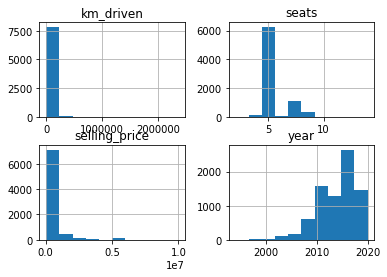

In [24]:
#Visualize the entire data map to give a check

df.hist(bins=10)

In [25]:
#Transform object values to integer or float values to represent correctly & test continuity

df['mileage'] = pd.to_numeric(df['mileage'])
df['max_power'] = pd.to_numeric(df['max_power'])
df['engine'] = pd.to_numeric(df['engine'])


Text(0.5, 0, 'mileage')

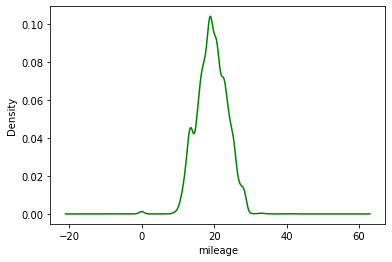

In [26]:
#Plot mileage column in order to explore about continuity: decide if should be categorical or not

df['mileage'].plot(kind='density', color='Green')
plt.xlabel('mileage')


Text(0.5, 0, 'mileage')

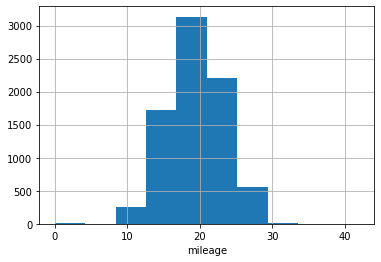

In [27]:
#Plot mileage column histogram in order to explore about continuity: decide if should be categorical or not

df.mileage.hist()
plt.xlabel('mileage')


Text(0.5, 0, 'max_power')

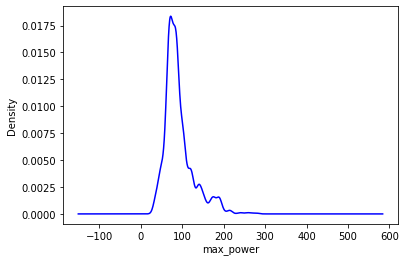

In [28]:
#Plot max_power column in order to explore about continuity: decide if should be categorical or not

df['max_power'].plot(kind='density', color='Blue')
plt.xlabel('max_power')



Text(0.5, 0, 'max_power')

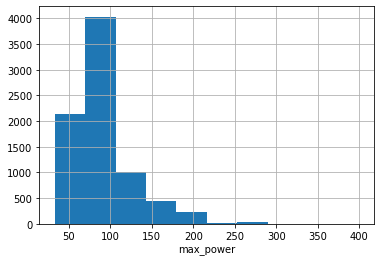

In [29]:
#Plot max_power column histogram in order to explore about continuity: decide if should be categorical or not

df.max_power.hist()
plt.xlabel('max_power')


Text(0.5, 0, 'engine')

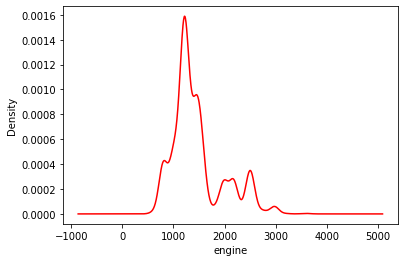

In [30]:
#Plot engine column in order to explore about continuity: decide if should be categorical or not

df['engine'].plot(kind='density', color='Red')
plt.xlabel('engine')



Text(0.5, 0, 'engine')

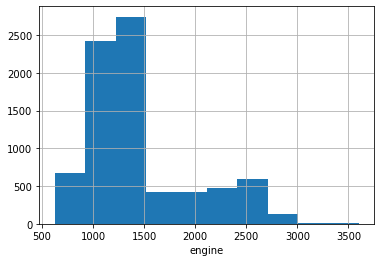

In [31]:
#Plot engine column histogram in order to explore about continuity: decide if should be categorical or not

df.engine.hist()
plt.xlabel('engine')


In [32]:
#Numeric Data Type Double Check

df.info()

#It's undersood that engine is int, mileage is float and max_power is also float due to suitability.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   int64  
 10  max_power      7906 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 803.1+ KB


Text(0, 0.5, 'selling price')

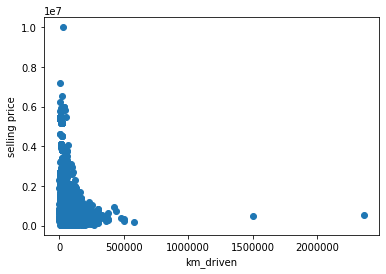

In [33]:
#Visualize Relationship between Selling Price and km_driven

plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling price')

#df['selling_price'], df['km_driven'].hist(bins=10)

#Outcome: In this shape, plots are meaningless. Firstly, all data will be converted to 0-1 scale version.

In [34]:
#Transform year data to age data

df.year = 2020 - df.year


In [35]:
#Test Year Data

print(df.year)
print(df.year.mean())

#6 Years Mean Age per car

0        6
1        6
2       14
3       10
4       13
        ..
8123     7
8124    13
8125    11
8126     7
8127     7
Name: year, Length: 7907, dtype: int64
6.017832300493234


Text(0, 0.5, 'selling price')

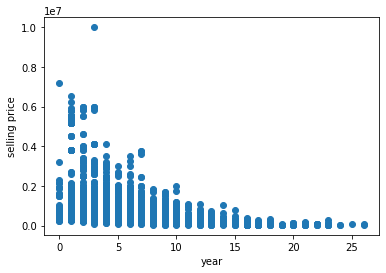

In [36]:
#Visualize Relationship between Selling Price and a dependent variable

plt.scatter(df['year'], df['selling_price'])
plt.xlabel('year')
plt.ylabel('selling price')

#df['selling_price','year'].hist(bins=10)

#Outcome: In this shape, plots are meaningless. Firstly, all data will be converted to 0-1 scale version.

Text(0, 0.5, 'selling price')

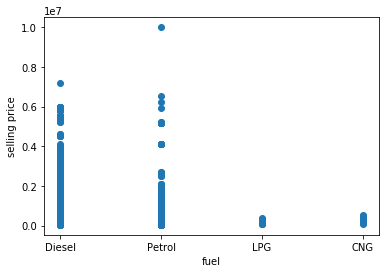

In [37]:
#Visualize Relationship between Selling Price and a dependent variable

plt.scatter(df['fuel'], df['selling_price'])
plt.xlabel('fuel')
plt.ylabel('selling price')

#Outcome: In this shape, plots are meaningless. Firstly, all data will be converted to 0-1 scale version.

Text(0, 0.5, 'selling price')

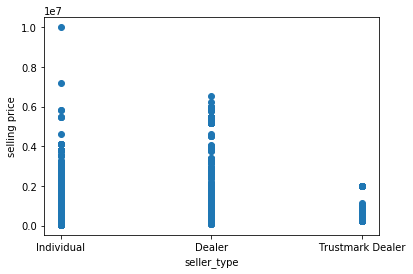

In [38]:
#Visualize Relationship between Selling Price and a dependent variable

plt.scatter(df['seller_type'], df['selling_price'])
plt.xlabel('seller_type')
plt.ylabel('selling price')

Text(0, 0.5, 'selling price')

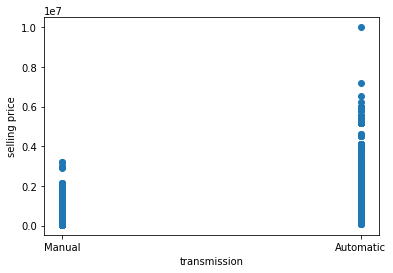

In [39]:
#Visualize Relationship between Selling Price and a dependent variable

plt.scatter(df['transmission'], df['selling_price'])
plt.xlabel('transmission')
plt.ylabel('selling price')

Text(0, 0.5, 'selling price')

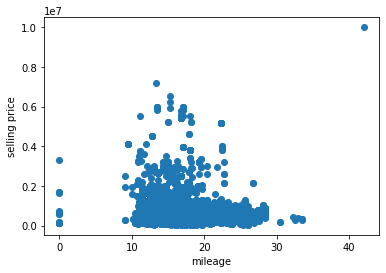

In [40]:
#Visualize Relationship between Selling Price and a dependent variable

plt.scatter(df['mileage'], df['selling_price'])
plt.xlabel('mileage')
plt.ylabel('selling price')

Text(0, 0.5, 'selling price')

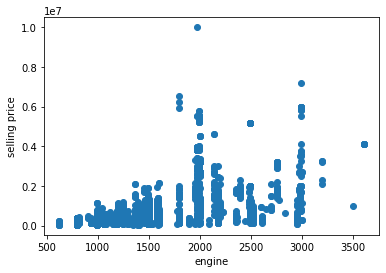

In [41]:
#Visualize Relationship between Selling Price and a dependent variable

plt.scatter(df['engine'], df['selling_price'])
plt.xlabel('engine')
plt.ylabel('selling price')

Text(0, 0.5, 'selling price')

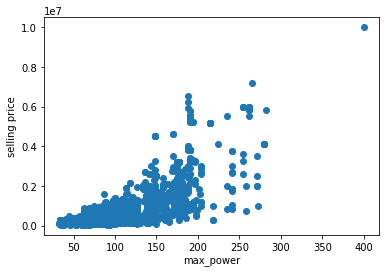

In [42]:
#Visualize Relationship between Selling Price and a dependent variable

plt.scatter(df['max_power'], df['selling_price'])
plt.xlabel('max_power')
plt.ylabel('selling price')

Text(0, 0.5, 'selling price')

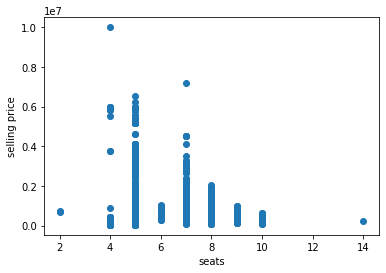

In [43]:
#Visualize Relationship between Selling Price and a dependent variable

plt.scatter(df['seats'], df['selling_price'])
plt.xlabel('seats')
plt.ylabel('selling price')

In [44]:
#Check Correlation

df_corr = df.corr(method= "pearson")
df_corr

year  selling_price  km_driven   mileage    engine  \
year           1.000000      -0.412268   0.428434 -0.329145 -0.018848   
selling_price -0.412268       1.000000  -0.222196 -0.126054  0.455734   
km_driven      0.428434      -0.222196   1.000000 -0.173073  0.205914   
mileage       -0.329145      -0.126054  -0.173073  1.000000 -0.575831   
engine        -0.018848       0.455734   0.205914 -0.575831  1.000000   
max_power     -0.226598       0.749674  -0.038159 -0.374621  0.703975   
seats          0.009144       0.041358   0.227336 -0.452085  0.610309   

               max_power     seats  
year           -0.226598  0.009144  
selling_price   0.749674  0.041358  
km_driven      -0.038159  0.227336  
mileage        -0.374621 -0.452085  
engine          0.703975  0.610309  
max_power       1.000000  0.191999  
seats           0.191999  1.000000

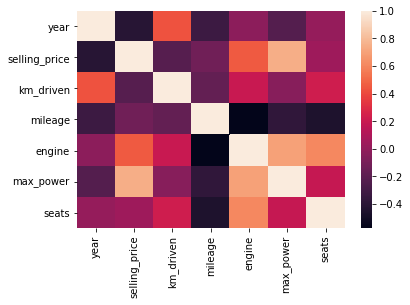

In [45]:
#Correlation Heatmap

sns.heatmap(df_corr)

#Selling price is the most correlated with engine and max_power based on the preliminary observation.

In [46]:
#Only Categorical Features to one-hot dummies
#Categorical Data are: seats, fuel, transmission, owner, name, seller_type

df = pd.get_dummies(df, columns=['seats'])
df = pd.get_dummies(df, columns=['owner'])
df = pd.get_dummies(df, columns=['fuel'])
df = pd.get_dummies(df, columns=['transmission'])
df = pd.get_dummies(df, columns=['seller_type'])



In [47]:
#Test dataframe with dummies

df

name  year  selling_price  km_driven  mileage  \
0           Maruti Swift Dzire VDI     6         450000     145500    23.40   
1     Skoda Rapid 1.5 TDI Ambition     6         370000     120000    21.14   
2         Honda City 2017-2020 EXi    14         158000     140000    17.70   
3        Hyundai i20 Sportz Diesel    10         225000     127000    23.00   
4           Maruti Swift VXI BSIII    13         130000     120000    16.10   
...                            ...   ...            ...        ...      ...   
8123             Hyundai i20 Magna     7         320000     110000    18.50   
8124         Hyundai Verna CRDi SX    13         135000     119000    16.80   
8125        Maruti Swift Dzire ZDi    11         382000     120000    19.30   
8126               Tata Indigo CR4     7         290000      25000    23.57   
8127               Tata Indigo CR4     7         290000      25000    23.57   

      engine  max_power  seats_2.0  seats_4.0  seats_5.0  ...  \
0       1248      74.00          0          0          1  ...   
1       1498     103.52          0          0          1  ...   
2       1497      78.00          0          0          1  ...   
3       1396      90.00          0          0          1  ...   
4       1298      88.20          0          0          1  ...   
...      ...        ...        ...        ...        ...  ...   
8123    1197      82.85          0          0          1  ...   
8124    1493     110.00          0          0          1  ...   
8125    1248      73.90          0          0          1  ...   
8126    1396      70.00          0          0          1  ...   
8127    1396      70.00          0          0          1  ...   

      owner_Third Owner  fuel_CNG  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0                     0         0            1         0            0   
1                     0         0            1         0            0   
2                     1         0            0         0            1   
3                     0         0            1         0            0   
4                     0         0            0         0            1   
...                 ...       ...          ...       ...          ...   
8123                  0         0            0         0            1   
8124                  0         0            1         0            0   
8125                  0         0            1         0            0   
8126                  0         0            1         0            0   
8127                  0         0            1         0            0   

      transmission_Automatic  transmission_Manual  seller_type_Dealer  \
0                          0                    1                   0   
1                          0                    1                   0   
2                          0                    1                   0   
3                          0                    1                   0   
4                          0                    1                   0   
...                      ...                  ...                 ...   
8123                       0                    1                   0   
8124                       0                    1                   0   
8125                       0                    1                   0   
8126                       0                    1                   0   
8127                       0                    1                   0   

      seller_type_Individual  seller_type_Trustmark Dealer  
0                          1                             0  
1                          1                             0  
2                          1                             0  
3                          1                             0  
4                          1                             0  
...                      ...                           ...  
8123                       1                             0  
8124                       1                             0

In [48]:
#Check Columns and Ranks

print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats_2.0', 'seats_4.0', 'seats_5.0', 'seats_6.0',
       'seats_7.0', 'seats_8.0', 'seats_9.0', 'seats_10.0', 'seats_14.0',
       'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'transmission_Automatic',
       'transmission_Manual', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer'],
      dtype='object')


In [49]:
#Apply 0-1 Scale to the dataset: only Continuous / Numeric Values


scaler = MinMaxScaler(feature_range=(0, 1))

#scale all, 1 by 1

list_max_power = scaler.fit_transform(df[["max_power"]])
df.loc[:, "max_power_scaled"] = list_max_power

list_year = scaler.fit_transform(df[["year"]])
df.loc[:, "year_scaled"] = list_year

list_selling_price = scaler.fit_transform(df[["selling_price"]])
df.loc[:, "selling_price_scaled"] = list_selling_price

list_km_driven = scaler.fit_transform(df[["km_driven"]])
df.loc[:, "km_driven_scaled"] = list_km_driven

list_mileage = scaler.fit_transform(df[["mileage"]])
df.loc[:, "mileage_scaled"] = list_mileage

list_engine = scaler.fit_transform(df[["engine"]])
df.loc[:, "engine_scaled"] = list_engine

list_selling_price = scaler.fit_transform(df[["selling_price"]])
df.loc[:, "selling_price"] = list_selling_price


In [50]:
#Drop Null Values

df.dropna(inplace=True)

In [51]:
#Test new Dataframe

df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats_2.0', 'seats_4.0', 'seats_5.0', 'seats_6.0',
       'seats_7.0', 'seats_8.0', 'seats_9.0', 'seats_10.0', 'seats_14.0',
       'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'transmission_Automatic',
       'transmission_Manual', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'max_power_scaled', 'year_scaled',
       'selling_price_scaled', 'km_driven_scaled', 'mileage_scaled',
       'engine_scaled'],
      dtype='object')

In [52]:
list_df = []
list_df.append(df.columns)

In [53]:
#Check Correlation
#2nd time since the new columns are added - one-hot columns 

df_corr_2 = df.corr(method= "pearson")
df_corr_2

year  selling_price  km_driven   mileage  \
year                          1.000000      -0.412302   0.428548 -0.328544   
selling_price                -0.412302       1.000000  -0.222158 -0.126280   
km_driven                     0.428548      -0.222158   1.000000 -0.172980   
mileage                      -0.328544      -0.126280  -0.172980  1.000000   
engine                       -0.018263       0.455682   0.206031 -0.576408   
max_power                    -0.226598       0.749674  -0.038159 -0.374621   
seats_2.0                    -0.022711       0.000991  -0.007476 -0.076540   
seats_4.0                     0.241042      -0.026217  -0.022879 -0.029766   
seats_5.0                    -0.083624      -0.047281  -0.196488  0.458146   
seats_6.0                    -0.069405      -0.007455  -0.040477  0.012921   
seats_7.0                    -0.024128       0.081453   0.152927 -0.361814   
seats_8.0                     0.081783      -0.013760   0.137468 -0.236530   
seats_9.0                     0.017571      -0.018610   0.074864 -0.121738   
seats_10.0                    0.043257      -0.018444   0.048897 -0.072849   
seats_14.0                    0.011598      -0.005735  -0.003800 -0.024272   
owner_First Owner            -0.491934       0.239850  -0.295470  0.166438   
owner_Fourth & Above Owner    0.205631      -0.073601   0.089244 -0.072118   
owner_Second Owner            0.317328      -0.178786   0.209913 -0.101811   
owner_Test Drive Car         -0.032661       0.116081  -0.024168 -0.015644   
owner_Third Owner             0.271317      -0.115113   0.148795 -0.097455   
fuel_CNG                     -0.029095      -0.033197  -0.005432  0.100821   
fuel_Diesel                  -0.037536       0.204831   0.271662  0.060256   
fuel_LPG                      0.059887      -0.035978   0.023095 -0.013924   
fuel_Petrol                   0.034351      -0.195074  -0.274460 -0.074927   
transmission_Automatic       -0.249002       0.590269  -0.201186 -0.178986   
transmission_Manual           0.249002      -0.590269   0.201186  0.178986   
seller_type_Dealer           -0.214525       0.401803  -0.178725  0.004940   
seller_type_Individual        0.243729      -0.386151   0.202851  0.011862   
seller_type_Trustmark Dealer -0.100385       0.032779  -0.083181 -0.036248   
max_power_scaled             -0.226598       0.749674  -0.038159 -0.374621   
year_scaled                   1.000000      -0.412302   0.428548 -0.328544   
selling_price_scaled         -0.412302       1.000000  -0.222158 -0.126280   
km_driven_scaled              0.428548      -0.222158   1.000000 -0.172980   
mileage_scaled               -0.328544      -0.126280  -0.172980  1.000000   
engine_scaled                -0.018263       0.455682   0.206031 -0.576408   

                                engine  max_power  seats_2.0  seats_4.0  \
year                         -0.018263  -0.226598  -0.022711   0.241042   
selling_price                 0.455682   0.749674   0.000991  -0.026217   
km_driven                     0.206031  -0.038159  -0.007476  -0.022879   
mileage                      -0.576408  -0.374621  -0.076540  -0.029766   
engine                        1.000000   0.703975   0.033600  -0.134109   
max_power                     0.703975   1.000000  -0.009607  -0.127642   
seats_2.0                     0.033600  -0.009607   1.000000  -0.002081   
seats_4.0                    -0.134109  -0.127642  -0.002081   1.000000   
seats_5.0                    -0.551311  -0.168642  -0.030950  -0.254510   
seats_6.0                     0.031206  -0.006576  -0.001414  -0.011629   
seats_7.0                     0.502895   0.241873  -0.006462  -0.053141   
seats_8.0                     0.229306   0.030309  -0.002784  -0.022895   
seats_9.0                     0.192764  -0.026446  -0.001608  -0.013225   
seats_10.0                    0.089519  -0.022986  -0.000781  -0.006420   
seats_14.0                    0.010922  -0.000499  -0.000179  -0.001471   
owner_First Owner        

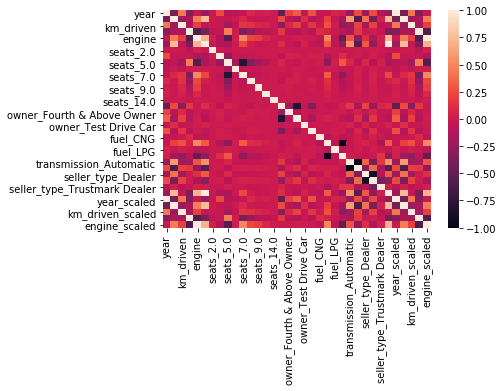

In [54]:
#Correlation Heatmap
#2nd time since the new columns are added - one-hot columns

sns.heatmap(df_corr_2)

#Selling price is the most correlated with engine and max_power based on the preliminary observation.

In [55]:
#Identify which variables to be used for each 3 sets

y_1 = df.iloc[:,32].values #dependent variable
x_1 = df.iloc[:,[30,31,35, 25, 26]].values 
#independent variables - only numerical case: max_power, year, engine, transmission

y_2 = df.iloc[:,32].values #dependent variable
x_2 = df.iloc[:,[33,35,7,8,9,10,11,12,13,14,15,21,22,23,24]].values
#inindependent variables - numerical + categorical: km_driven, engine, seats, fuel

y_3 = df.iloc[:,32].values #dependent variable
x_3 = df.iloc[:,[31,34,16,17,18,19,20,25,26,27,28,29]].values
#independent variables - numerical + categorical: year, mileage, owner_type, transmission, seller_type

#scaler = MinMaxScaler(feature_range = (0,1))
#df = scaler.fit_transform(df[2])


In [56]:
#Experimental trial on which variables to be taken as independent based on correlation results and exploration of the data

y_4 = df.iloc[:,32].values #dependent variable
x_4 = df.iloc[:,[31,33,34,35]].values 
#independent variables - only numerical case: year, km_driven, mileage, engine


In [57]:
#Split Training & Test Sets

x_4_train, x_4_test, y_4_train, y_4_test = train_test_split(x_4, y_4, test_size=0.2, random_state=142)


In [58]:
#Fit the training data to the model for Set #4

model_4 = LinearRegression()


In [59]:
#dependent variables - only numerical case: year, km__driven, mileage, engine

model_4.fit(x_4_train, y_4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
#Experimental Score Not Satisfactory: model 1 is higher

score_4 = model_4.score(x_4_test, y_4_test)
print(score_4)

0.3474801832839849


In [61]:
# Predict the values by using all test data #1
y_4_pred = model_4.predict(x_4_test)
y_4_pred

array([0.09811871, 0.05675628, 0.14168968, ..., 0.04568361, 0.07846747,
       0.15485252])

In [62]:
# Calculate mean squared error of predicted values #4
mse_4 = mean_squared_error(y_4_test, y_4_pred)
print(mse_4)

0.005246077999307379


In [63]:
#Experimental trial on which variables to be taken as independent based on correlation results and exploration of the data
#Model 5

y_5 = df.iloc[:,32].values #dependent variable
x_5 = df.iloc[:,[30,33,34,35]].values 
#independent variables - only numerical case: max_power, km_driven, mileage, engine


In [64]:
#Split Training & Test Sets

x_5_train, x_5_test, y_5_train, y_5_test = train_test_split(x_5, y_5, test_size=0.2, random_state=142)


In [65]:
#Fit the training data to the model for Set #5

model_5 = LinearRegression()


In [66]:
#dependent variables - only numerical case: max_power, km__driven, mileage, engine

model_5.fit(x_5_train, y_5_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
#Experimental Score Not Satisfactory: model 1 is higher

score_5 = model_5.score(x_5_test, y_5_test)
print(score_5)

0.5843579171161487


In [68]:
# Predict the values by using all test data #5
y_5_pred = model_5.predict(x_5_test)
y_5_pred

array([0.1340479 , 0.06187498, 0.01107015, ..., 0.06493868, 0.09391981,
       0.24458145])

In [69]:
# Calculate mean squared error of predicted values #5
mse_5 = mean_squared_error(y_5_test, y_5_pred)
print(mse_5)

0.003341646844653982


In [70]:
#Experimental trial on which variables to be taken as independent based on correlation results and exploration of the data
#Model 6
#Max_power, engine, year, transmission

y_6 = df.iloc[:,32].values #dependent variable
x_6 = df.iloc[:,[30,31,35, 34]].values 
#independent variables - only numerical case: max_power, year, engine, mileage 





In [71]:
#Split Training & Test Sets

x_6_train, x_6_test, y_6_train, y_6_test = train_test_split(x_6, y_6, test_size=0.2, random_state=142)


In [72]:
#Fit the training data to the model for Set #6

model_6 = LinearRegression()


In [73]:
#dependent variables - only numerical case: max_power, year, engine, transmission

model_6.fit(x_6_train, y_6_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#Experimental Score Not Satisfactory: model 1 is higher

score_6 = model_6.score(x_6_test, y_6_test)
print(score_6)

0.6210179190261755


In [75]:
# Predict the values by using all test data #6
y_6_pred = model_6.predict(x_6_test)
y_6_pred

array([ 0.13643845,  0.0435142 , -0.0028891 , ...,  0.05521508,
        0.0842    ,  0.24378149])

In [76]:
# Calculate mean squared error of predicted values #5
mse_6 = mean_squared_error(y_6_test, y_5_pred)
print(mse_6)

0.003341646844653982


In [77]:
#Split Training & Test Sets

#1
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.2, random_state=142)
#2
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.2, random_state=142)
#3
x_3_train, x_3_test, y_3_train, y_3_test = train_test_split(x_3, y_3, test_size=0.2, random_state=142)


In [78]:
# Print the number of instances in training & test set

print("x_1_train: ", x_1_train.shape)
print("x_1_test: ",x_1_test.shape)
print("y_1_train: ",y_1_train.shape)
print("y_1_test: ",y_1_test.shape, "\n")

print(x_2_test)

x_1_train:  (6324, 5)
x_1_test:  (1582, 5)
y_1_train:  (6324,)
y_1_test:  (1582,) 

[[0.02118192 0.39395973 0.         ... 0.         0.         1.        ]
 [0.02253336 0.20939597 0.         ... 1.         0.         0.        ]
 [0.02965486 0.63724832 0.         ... 1.         0.         0.        ]
 ...
 [0.02118192 0.20939597 0.         ... 1.         0.         0.        ]
 [0.02541839 0.29328859 0.         ... 1.         0.         0.        ]
 [0.00317693 0.46006711 0.         ... 1.         0.         0.        ]]


In [79]:
#Initialize the linear regression model

model_1 = LinearRegression()
model_2 = LinearRegression(fit_intercept=False)
model_3 = LinearRegression(fit_intercept=False)

#In order to escape from the dummy variable trap; where dependent categorical variables are multicollinear;
#The intercept column is dropped as a precaution.

In [80]:
#Fit the training data to the model for Set1
#dependent variables - only numerical case: max_power, km__driven, mileage, engine

model_1.fit(x_1_train, y_1_train)
print(model_1.coef_)

[ 0.50573195 -0.12072124 -0.01721687  0.02415591 -0.02415591]


In [81]:
#Print the general formula of our linear regression model #1

_str_1 = "y = "
for i, m in enumerate(model_1.coef_):
    _str_1 += "x_{}*{}+".format(i+1, m)
_str_1 += str(model_1.intercept_)
print(_str_1)


y = x_1*0.5057319488978952+x_2*-0.12072123808077749+x_3*-0.017216867651758953+x_4*0.024155910436597764+x_5*-0.024155910436598028+0.031227817131498675


In [82]:
#Fit the training data to the model for Set #2
#dependent variables - numerical + categorical: km_driven, engine, seats, fuel

model_2.fit(x_2_train, y_2_train)
print(model_2.coef_)

[-1.27382539  0.33195085 -0.08958293  0.08935041  0.05527244  0.00270791
 -0.0035528  -0.0144827  -0.05849914 -0.06205764 -0.06817468 -0.04276506
 -0.03176566 -0.02962077 -0.04486764]


In [83]:
#Print the general formula of our linear regression model #2

_str_2 = "y = "
for i, m in enumerate(model_2.coef_):
    _str_2 += "x_{}*{} + ".format(i+1, m)
_str_2 += str(model_2.intercept_)
print(_str_2)


y = x_1*-1.2738253912556041 + x_2*0.3319508454343812 + x_3*-0.08958292713617969 + x_4*0.08935041357538881 + x_5*0.05527243904202613 + x_6*0.002707909914017033 + x_7*-0.0035527994660701796 + x_8*-0.014482696496453961 + x_9*-0.05849914345452442 + x_10*-0.06205764450793282 + x_11*-0.06817468262662417 + x_12*-0.04276506279138059 + x_13*-0.031765662361412664 + x_14*-0.0296207676816803 + x_15*-0.04486763832187965 + 0.0


In [84]:
#Fit the training data to the model for Set #3
#dependent variables - numerical + categorical: year, mileage, owner_type, transmission, seller_type

model_3.fit(x_3_train, y_3_train)
print(model_3.coef_)

[-0.17180771 -0.13400081 -0.00981649 -0.00601252 -0.01252912  0.29054539
 -0.01052545  0.1744974   0.07716441  0.11914872  0.07847075  0.05404234]


In [85]:
#Print the general formula of our linear regression model #3

_str_3 = "y = "
for i, m in enumerate(model_3.coef_):
    _str_3 += "x_{}*{} + ".format(i+1, m)
_str_3 += str(model_3.intercept_)
print(_str_3)


y = x_1*-0.1718077063126107 + x_2*-0.13400080662407537 + x_3*-0.00981649421672407 + x_4*-0.006012515976332863 + x_5*-0.01252911791103801 + x_6*0.290545387789146 + x_7*-0.01052545107890477 + x_8*0.17449740350060994 + x_9*0.07716440510553582 + x_10*0.11914871593538952 + x_11*0.0784707500890458 + x_12*0.054042342581710624 + 0.0


In [86]:
# Calculate the score of the model in test data #1
#Returns the coefficient of determination R^2 of the prediction

score_1 = model_1.score(x_1_test, y_1_test)
print(score_1)

0.6577181259209612


In [87]:
# Calculate the score of the model in test data #2
#Returns the coefficient of determination R^2 of the prediction

score_2 = model_2.score(x_2_test, y_2_test)
print(score_2)

0.28682654897522253


In [88]:
# Calculate the score of the model in test data #3
#Returns the coefficient of determination R^2 of the prediction

score_3 = model_3.score(x_3_test, y_3_test)
print(score_3)

0.4989777557204155


In [89]:
# Predict the values by using all test data #1
y_1_pred = model_1.predict(x_1_test)
y_1_pred

array([0.1220032 , 0.03235136, 0.0039525 , ..., 0.04809177, 0.06943085,
       0.25932585])

In [90]:
# Calculate mean squared error of predicted values #1
mse_1 = mean_squared_error(y_1_test, y_1_pred)
print(mse_1)

0.0027518511517470555


In [91]:
#Calculate the root mean squared error of predicted values #1
rmse_1 = (mean_squared_error(y_1_test, y_1_pred))**(0.5)
print(rmse_1)

0.05245808947862146


In [92]:
#Calculate absolute squared error of predicted values #1
mae_1 = mean_absolute_error(y_1_test, y_1_pred)
print(mae_1)

0.029483039497336758


In [93]:
# Predict the values by using all test data #2
y_2_pred = model_2.predict(x_2_test)
y_2_pred

array([0.11419799, 0.06431238, 0.13844154, ..., 0.00720864, 0.08848558,
       0.17217959])

In [94]:
# Calculate mean squared error of predicted values #2
mse_2 = mean_squared_error(y_2_test, y_2_pred)
print(mse_2)

0.005733716364264065


In [95]:
#Calculate the root mean squared error of predicted values #2
rmse_2 = (mean_squared_error(y_2_test, y_2_pred))**(0.5)
print(rmse_2)

0.07572130720123672


In [96]:
#Calculate absolute squared error of predicted values #2
mae_2 = mean_absolute_error(y_2_test, y_2_pred)
print(mae_2)

0.03894436042943527


In [97]:
# Predict the values by using all test data #3
y_3_pred = model_3.predict(x_3_test)
y_3_pred

array([0.06721844, 0.05623863, 0.04864243, ..., 0.03058353, 0.03269728,
       0.22368512])

In [98]:
# Calculate mean squared error of predicted values #3
mse_3 = mean_squared_error(y_3_test, y_3_pred)
print(mse_3)

0.004028079616197541


In [99]:
#Calculate the root mean squared error of predicted values #3
rmse_3 = (mean_squared_error(y_3_test, y_3_pred))**(0.5)
print(rmse_3)

0.06346715383722151


In [100]:
#Calculate absolute squared error of predicted values #3
mae_3 = mean_absolute_error(y_3_test, y_3_pred)
print(mae_3)

0.032829076515161426


In [101]:
# Print the predicted and the actual value of the first row in test set: case #1
"Predicted #1: {}, Actual: {}".format(y_1_pred[1], y_1_test[1])

'Predicted #1: 0.03235136171772934, Actual: 0.042126475212991454'

In [102]:
# Print the predicted and the actual value of the first row in test set: case #2
"Predicted #2: {}, Actual: {}".format(y_2_pred[1], y_2_test[1])

'Predicted #2: 0.06431238347834864, Actual: 0.042126475212991454'

In [103]:
# Print the predicted and the actual value of the first row in test set: case #3
"Predicted #3: {}, Actual: {}".format(y_3_pred[1], y_3_test[1])

'Predicted #3: 0.05623862535717274, Actual: 0.042126475212991454'

In [104]:
#Intercept & Slope Values: #1
#Slope values for each feature is represented

model_1.intercept_
model_1.coef_

print(model_1.intercept_, model_1.coef_)

0.031227817131498675 [ 0.50573195 -0.12072124 -0.01721687  0.02415591 -0.02415591]


In [105]:
#Intercept & Slope Values: #2
#Slope values for each feature is represented

model_2.intercept_
model_2.coef_

print(model_2.intercept_, model_2.coef_)

0.0 [-1.27382539  0.33195085 -0.08958293  0.08935041  0.05527244  0.00270791
 -0.0035528  -0.0144827  -0.05849914 -0.06205764 -0.06817468 -0.04276506
 -0.03176566 -0.02962077 -0.04486764]


In [106]:
#Intercept & Slope Values: #3
#Slope values for each feature is represented

model_3.intercept_
model_3.coef_

print(model_3.intercept_, model_3.coef_)

0.0 [-0.17180771 -0.13400081 -0.00981649 -0.00601252 -0.01252912  0.29054539
 -0.01052545  0.1744974   0.07716441  0.11914872  0.07847075  0.05404234]


In [107]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#1st Model: With [0] independent variable from model_1, based on its slope, prediction values are created.

def myfunction_0(x_1_test):
    return model_1.coef_[0]*x_1_test+model_1.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_0=list(map(myfunction_0, x_1_test)) 


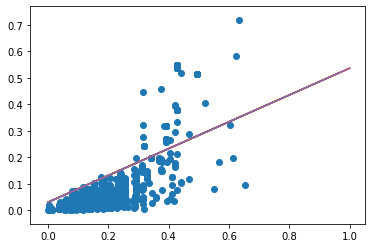

In [108]:
#Let's scatter the x data and plot the estimated line 
#In scatter [0] from model_1 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_1_test[:,0], y_1_test)
plt.plot(x_1_test, myprediction_0)
plt.show()

In [109]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#1st Model: With [1] independent variable from model_1, based on its slope, prediction values are created.

def myfunction_1(x_1_test):
    return model_1.coef_[1]*x_1_test+model_1.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_1=list(map(myfunction_1, x_1_test))

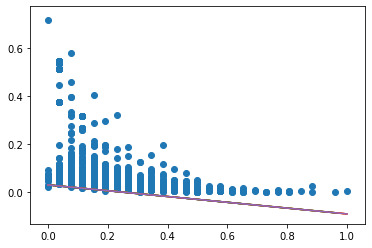

In [110]:
#Let's scatter the x data and plot the estimated line 
#In scatter [1] from model_1 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_1_test[:,1], y_1_test)
plt.plot(x_1_test, myprediction_1)
plt.show()

In [111]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#1st Model: With [2] independent variable from model_1, based on its slope, prediction values are created.

def myfunction_2(x_1_test):
    return model_1.coef_[2]*x_1_test+model_1.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2=list(map(myfunction_2, x_1_test))

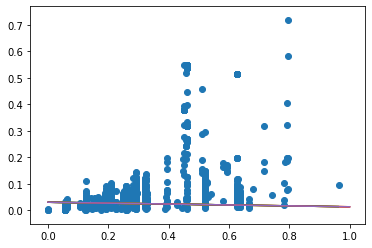

In [112]:
#Let's scatter the x data and plot the estimated line 
#In scatter [2] from model_1 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_1_test[:,2], y_1_test)
plt.plot(x_1_test, myprediction_2)
plt.show()

In [113]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#1st Model: With [3] independent variable from model_1, based on its slope, prediction values are created.

def myfunction_3(x_1_test):
    return model_1.coef_[3]*x_1_test+model_1.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3=list(map(myfunction_3, x_1_test))

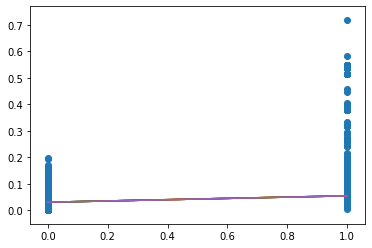

In [114]:
#Let's scatter the x data and plot the estimated line 
#In scatter [3] from model_1 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_1_test[:,3], y_1_test)
plt.plot(x_1_test, myprediction_3)
plt.show()

In [115]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#1st Model: With [4] independent variable from model_1, based on its slope, prediction values are created.

def myfunction_4(x_1_test):
    return model_1.coef_[4]*x_1_test+model_1.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_4=list(map(myfunction_4, x_1_test))

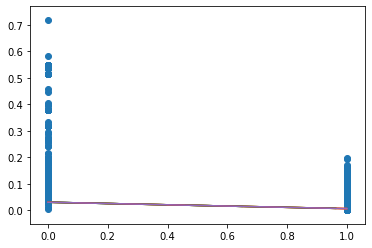

In [116]:
#Let's scatter the x data and plot the estimated line 
#In scatter [4] from model_1 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [4]th variable's space. 

plt.scatter(x_1_test[:,4], y_1_test)
plt.plot(x_1_test, myprediction_4)
plt.show()

In [117]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [0] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_0(x_2_test):
    return (model_2.coef_[0]*x_2_test) + model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_0=list(map(myfunction_2_0, x_2_test)) 


In [118]:
print(x_2_test)

[[0.02118192 0.39395973 0.         ... 0.         0.         1.        ]
 [0.02253336 0.20939597 0.         ... 1.         0.         0.        ]
 [0.02965486 0.63724832 0.         ... 1.         0.         0.        ]
 ...
 [0.02118192 0.20939597 0.         ... 1.         0.         0.        ]
 [0.02541839 0.29328859 0.         ... 1.         0.         0.        ]
 [0.00317693 0.46006711 0.         ... 1.         0.         0.        ]]


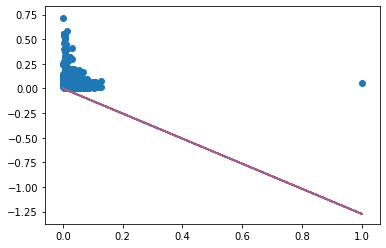

In [119]:
#Let's scatter the x data and plot the estimated line 
#In scatter [0] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,0], y_1_test)
plt.plot(x_2_test, myprediction_2_0)
plt.show()

In [120]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [1] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_1(x_2_test):
    return model_2.coef_[1]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_1=list(map(myfunction_2_1, x_2_test)) 


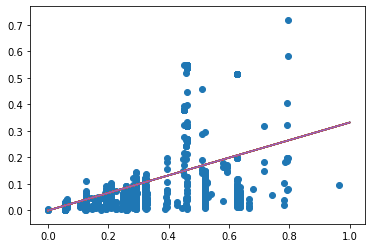

In [121]:
#Let's scatter the x data and plot the estimated line 
#In scatter [1] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,1], y_1_test)
plt.plot(x_2_test, myprediction_2_1)
plt.show()

In [122]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [2] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_2(x_2_test):
    return model_2.coef_[2]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_2=list(map(myfunction_2_2, x_2_test)) 


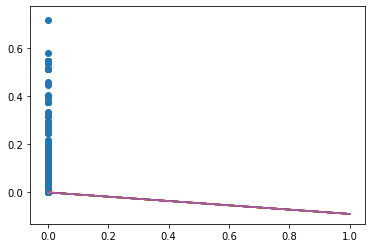

In [123]:
#Let's scatter the x data and plot the estimated line 
#In scatter [2] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,2], y_1_test)
plt.plot(x_2_test, myprediction_2_2)
plt.show()

In [124]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [3] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_3(x_2_test):
    return model_2.coef_[3]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_3=list(map(myfunction_2_3, x_2_test)) 


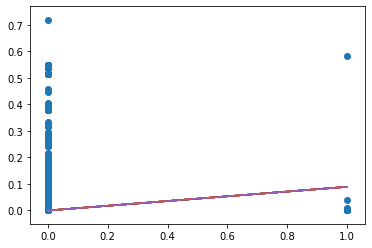

In [125]:
#Let's scatter the x data and plot the estimated line 
#In scatter [3] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,3], y_1_test)
plt.plot(x_2_test, myprediction_2_3)
plt.show()

In [126]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [4] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_4(x_2_test):
    return model_2.coef_[4]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_4=list(map(myfunction_2_4, x_2_test)) 


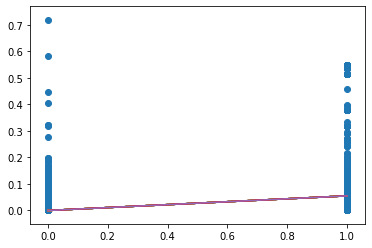

In [127]:
#Let's scatter the x data and plot the estimated line 
#In scatter [4] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,4], y_1_test)
plt.plot(x_2_test, myprediction_2_4)
plt.show()

In [128]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [5] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_5(x_2_test):
    return model_2.coef_[5]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_5=list(map(myfunction_2_5, x_2_test)) 


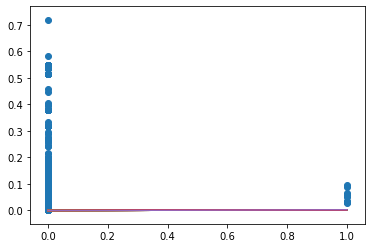

In [129]:
#Let's scatter the x data and plot the estimated line 
#In scatter [5] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,5], y_1_test)
plt.plot(x_2_test, myprediction_2_5)
plt.show()

In [130]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [6] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_6(x_2_test):
    return model_2.coef_[6]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_6=list(map(myfunction_2_6, x_2_test)) 


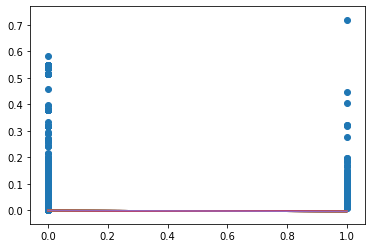

In [131]:
#Let's scatter the x data and plot the estimated line 
#In scatter [6] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,6], y_1_test)
plt.plot(x_2_test, myprediction_2_6)
plt.show()

In [132]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [7] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_7(x_2_test):
    return model_2.coef_[7]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_7=list(map(myfunction_2_7, x_2_test)) 


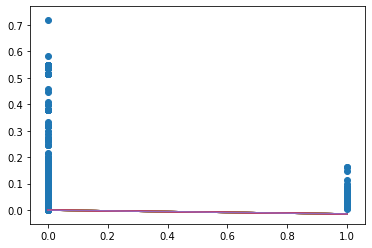

In [133]:
#Let's scatter the x data and plot the estimated line 
#In scatter [7] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,7], y_1_test)
plt.plot(x_2_test, myprediction_2_7)
plt.show()

In [134]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [8] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_8(x_2_test):
    return model_2.coef_[8]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_8=list(map(myfunction_2_8, x_2_test)) 


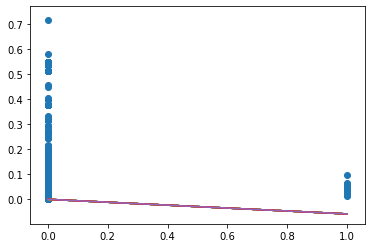

In [135]:
#Let's scatter the x data and plot the estimated line 
#In scatter [8] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,8], y_1_test)
plt.plot(x_2_test, myprediction_2_8)
plt.show()

In [136]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [9] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_9(x_2_test):
    return model_2.coef_[9]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_9=list(map(myfunction_2_9, x_2_test)) 


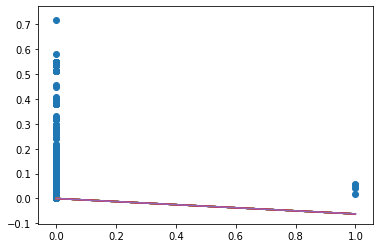

In [137]:
#Let's scatter the x data and plot the estimated line 
#In scatter [9] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,9], y_1_test)
plt.plot(x_2_test, myprediction_2_9)
plt.show()

In [138]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [10] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_10(x_2_test):
    return model_2.coef_[10]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_10=list(map(myfunction_2_10, x_2_test)) 


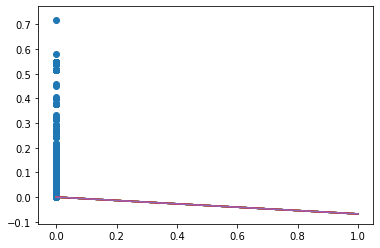

In [139]:
#Let's scatter the x data and plot the estimated line 
#In scatter [10] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,10], y_1_test)
plt.plot(x_2_test, myprediction_2_10)
plt.show()

In [140]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [11] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_11(x_2_test):
    return model_2.coef_[11]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_11=list(map(myfunction_2_11, x_2_test)) 


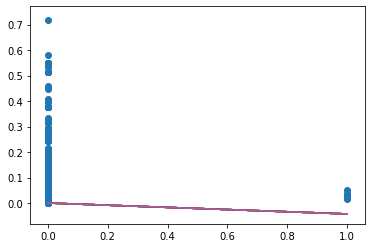

In [141]:
#Let's scatter the x data and plot the estimated line 
#In scatter [11] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,11], y_1_test)
plt.plot(x_2_test, myprediction_2_11)
plt.show()

In [142]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [12] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_12(x_2_test):
    return model_2.coef_[12]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_12=list(map(myfunction_2_12, x_2_test)) 


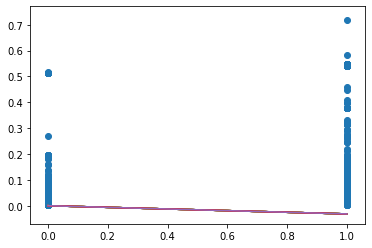

In [143]:
#Let's scatter the x data and plot the estimated line 
#In scatter [12] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,12], y_1_test)
plt.plot(x_2_test, myprediction_2_12)
plt.show()

In [144]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [13] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_13(x_2_test):
    return model_2.coef_[13]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_13=list(map(myfunction_2_13, x_2_test)) 


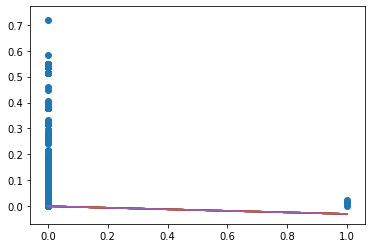

In [145]:
#Let's scatter the x data and plot the estimated line 
#In scatter [13] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,13], y_1_test)
plt.plot(x_2_test, myprediction_2_13)
plt.show()

In [146]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#2nd Model: With [14] independent variable from model_2, based on its slope, prediction values are created.

def myfunction_2_13(x_2_test):
    return model_2.coef_[14]*x_2_test+model_2.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_2_14=list(map(myfunction_2_13, x_2_test)) 

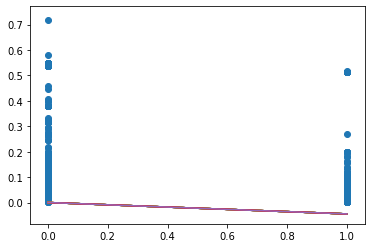

In [147]:
#Let's scatter the x data and plot the estimated line 
#In scatter [14] from model_2 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_2_test[:,14], y_1_test)
plt.plot(x_2_test, myprediction_2_14)
plt.show()

In [148]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [0] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_0(x_3_test):
    return model_3.coef_[0]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_0=list(map(myfunction_3_0, x_3_test))

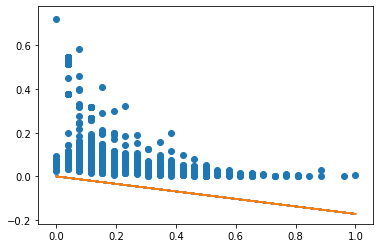

In [149]:
#Let's scatter the x data and plot the estimated line 
#In scatter [0] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [0]th variable's space. 

plt.scatter(x_3_test[:,0], y_3_test)
plt.plot(x_3_test, myprediction_3_0)
plt.show()

In [150]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [1] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_1(x_3_test):
    return model_3.coef_[1]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_1=list(map(myfunction_3_1, x_3_test))

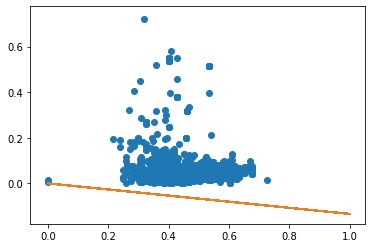

In [151]:
#Let's scatter the x data and plot the estimated line 
#In scatter [1] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [1] variable's space. 

plt.scatter(x_3_test[:,1], y_3_test)
plt.plot(x_3_test, myprediction_3_1)
plt.show()

In [152]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [2] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_2(x_3_test):
    return model_3.coef_[2]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_2=list(map(myfunction_3_1, x_3_test))

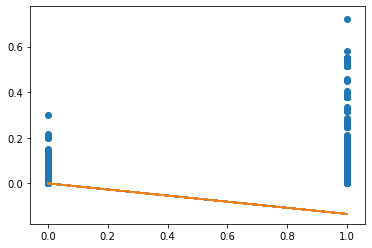

In [153]:
#Let's scatter the x data and plot the estimated line 
#In scatter [2] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [2] variable's space. 

plt.scatter(x_3_test[:,2], y_3_test)
plt.plot(x_3_test, myprediction_3_2)
plt.show()

In [154]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [3] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_3(x_3_test):
    return model_3.coef_[3]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_4=list(map(myfunction_3_3, x_3_test))

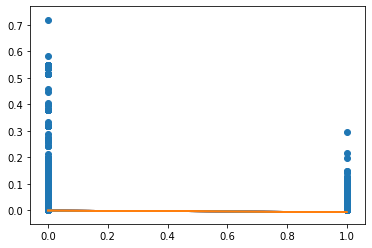

In [155]:
#Let's scatter the x data and plot the estimated line 
#In scatter [4] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [4] variable's space. 

plt.scatter(x_3_test[:,4], y_3_test)
plt.plot(x_3_test, myprediction_3_4)
plt.show()

In [156]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [4] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_4(x_3_test):
    return model_3.coef_[4]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_4=list(map(myfunction_3_4, x_3_test))

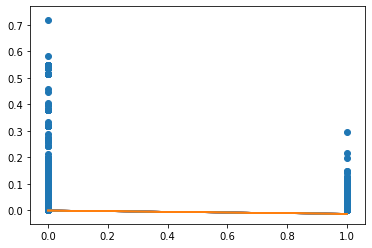

In [157]:
#Let's scatter the x data and plot the estimated line 
#In scatter [4] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [4] variable's space. 

plt.scatter(x_3_test[:,4], y_3_test)
plt.plot(x_3_test, myprediction_3_4)
plt.show()

In [158]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [5] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_5(x_3_test):
    return model_3.coef_[5]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_5=list(map(myfunction_3_5, x_3_test))

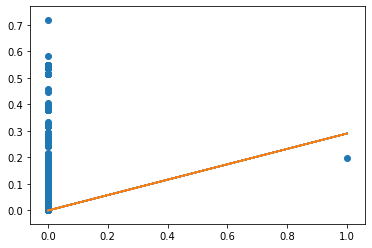

In [159]:
#Let's scatter the x data and plot the estimated line 
#In scatter [5] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [5] variable's space. 

plt.scatter(x_3_test[:,5], y_3_test)
plt.plot(x_3_test, myprediction_3_5)
plt.show()

In [160]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [6] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_6(x_3_test):
    return model_3.coef_[6]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_6=list(map(myfunction_3_6, x_3_test))

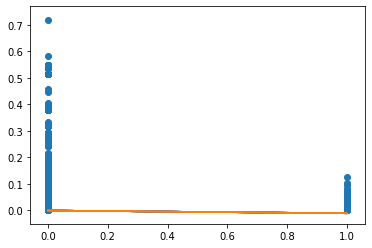

In [161]:
#Let's scatter the x data and plot the estimated line 
#In scatter [6] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [6] variable's space. 

plt.scatter(x_3_test[:,6], y_3_test)
plt.plot(x_3_test, myprediction_3_6)
plt.show()

In [162]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [7] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_7(x_3_test):
    return model_3.coef_[7]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_7=list(map(myfunction_3_7, x_3_test))

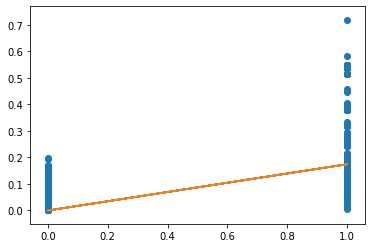

In [163]:
#Let's scatter the x data and plot the estimated line 
#In scatter [7] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [7] variable's space. 

plt.scatter(x_3_test[:,7], y_3_test)
plt.plot(x_3_test, myprediction_3_7)
plt.show()

In [164]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [8] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_8(x_3_test):
    return model_3.coef_[8]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_8=list(map(myfunction_3_8, x_3_test))

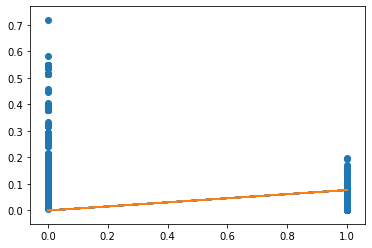

In [165]:
#Let's scatter the x data and plot the estimated line 
#In scatter [8] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [8] variable's space. 

plt.scatter(x_3_test[:,8], y_3_test)
plt.plot(x_3_test, myprediction_3_8)
plt.show()

In [166]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [9] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_9(x_3_test):
    return model_3.coef_[9]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_9=list(map(myfunction_3_9, x_3_test))

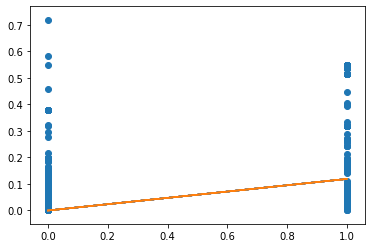

In [167]:
#Let's scatter the x data and plot the estimated line 
#In scatter [9] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [9] variable's space. 

plt.scatter(x_3_test[:,9], y_3_test)
plt.plot(x_3_test, myprediction_3_9)
plt.show()

In [168]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [10] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_10(x_3_test):
    return model_3.coef_[10]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_10=list(map(myfunction_3_10, x_3_test))

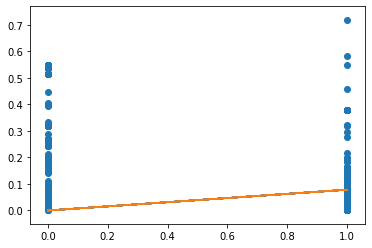

In [169]:
#Let's scatter the x data and plot the estimated line 
#In scatter [10] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [10] variable's space. 

plt.scatter(x_3_test[:,10], y_3_test)
plt.plot(x_3_test, myprediction_3_10)
plt.show()

In [170]:
#Predicting a y value based on x value, function provided. Reference: Aydogan
#3rd Model: With [11] independent variable from model_3, based on its slope, prediction values are created.

def myfunction_3_11(x_3_test):
    return model_3.coef_[11]*x_3_test+model_3.intercept_

#It will call my function for each element in the list x and it creates a list of those estimated y values
myprediction_3_11=list(map(myfunction_3_11, x_3_test))

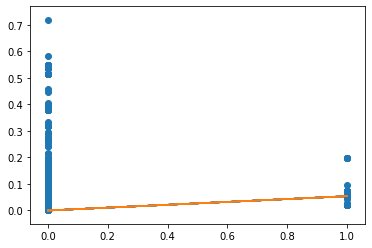

In [171]:
#Let's scatter the x data and plot the estimated line 
#In scatter [11] from model_3 and respective selling_price data is represented
#In plot, it's just like mirroring a 4D line on the [11] variable's space. 

plt.scatter(x_3_test[:,11], y_3_test)
plt.plot(x_3_test, myprediction_3_11)
plt.show()

In [172]:
#There are 12 of them!

print(model_3.coef_)

[-0.17180771 -0.13400081 -0.00981649 -0.00601252 -0.01252912  0.29054539
 -0.01052545  0.1744974   0.07716441  0.11914872  0.07847075  0.05404234]


In [173]:
#Based on scores and metrics, the best performer model equation:

#Print the general formula of our linear regression model #1

_str_1 = "y = "
for i, m in enumerate(model_1.coef_):
    _str_1 += "x_{}*{}+".format(i+1, m)
_str_1 += str(model_1.intercept_)
print(_str_1)


y = x_1*0.5057319488978952+x_2*-0.12072123808077749+x_3*-0.017216867651758953+x_4*0.024155910436597764+x_5*-0.024155910436598028+0.031227817131498675
